../campaign/aion/org.choco.choco-v4.10.14-mzn2024.csv : Number of erroneous rows:  7
../campaign/aion/org.choco.choco-v4.10.14-mzn2024.csv 134    ../data/mzn-challenge/2024/yumi-dynamic/p_9_GS...
160    ../data/mzn-challenge/2024/neighbours/neightbo...
167    ../data/mzn-challenge/2024/aircraft-disassembl...
175    ../data/mzn-challenge/2024/monitor-placement-1...
178    ../data/mzn-challenge/2024/peacable_queens/pq_...
222    ../data/mzn-challenge/2024/peacable_queens/pq_...
273    ../data/mzn-challenge/2024/monitor-placement-1...
Name: data_file, dtype: object


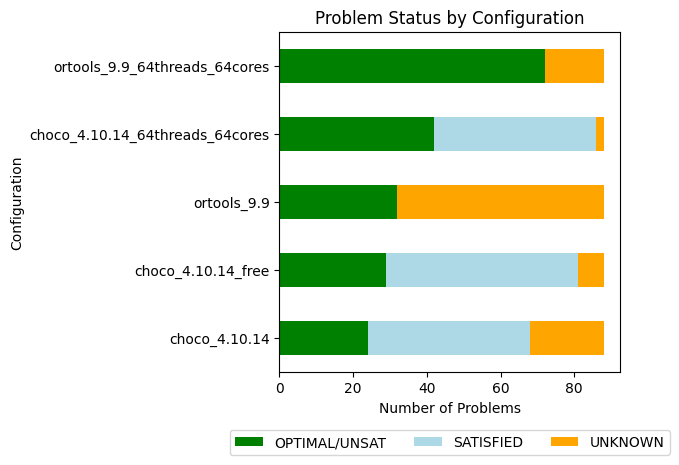

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
2,org.choco.choco_4.10.14_aion_1200s,4.10.14,aion,choco_4.10.14,30920.755393,10026.094903,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,88,0.0,0.0,0.0,88,0.0,0.0,88,0.0,24,44,20,0,0,0.0
0,com.google.ortools.sat_9.9_aion_1200s,9.9,aion,ortools_9.9,9382.929540,2844.108864,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,88,0.0,0.0,0.0,88,0.0,0.0,88,0.0,32,0,56,0,0,0.0
3,org.choco.choco_4.10.14_aion_1200s_64threads_64cores,4.10.14,aion,choco_4.10.14_64threads_64cores,4120.053202,1452.867586,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,88,0.0,0.0,0.0,88,0.0,0.0,88,0.0,42,44,2,0,0,0.0
4,org.choco.choco_4.10.14_aion_1200s_free,4.10.14,aion,choco_4.10.14_free,3539.776772,1314.723314,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,88,0.0,0.0,0.0,88,0.0,0.0,88,0.0,29,52,7,0,0,0.0
1,com.google.ortools.sat_9.9_aion_1200s_64threads_64cores,9.9,aion,ortools_9.9_64threads_64cores,47.753225,0.448730,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,88,0.0,0.0,0.0,88,0.0,0.0,88,0.0,72,0,16,0,0,0.0


In [10]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  "../campaign/aion/org.choco.choco-v4.10.14-mzn2024.csv",
  "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]

mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noset.csv")
# print(mzn_challenge)
mzn_data = set(mzn_challenge['data_file'])
df = df[df['data_file'].isin(mzn_data)]
# df = df[(df['status'] != "ERROR")]
# Instances that might have been solved during flattening.
# df = df[~(df['preprocessing_time'].isna())]

# analysis.show_problem_table(df)

df = analysis.intersect(df)

# df = df[df['timeout_ms'] == 1200000]

# print(df[df['preprocessing_time'] >= 1200])

# analysis.show_problem_table(df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128"])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
# print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))

# analysis.plot_time_distribution("hybrid264-4096-sub15", df[df['uid'] == "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72"])
# analysis.plot_time_distribution("gpu", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_gpu_ac1_4096_64"])
# analysis.plot_time_distribution("hybrid264-wac1-4096-sub15", df[df['uid'] == "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_33554432_264_72"])
# analysis.plot_time_distribution("hybrid264-wac1-4096-sub20", df[df['uid'] == "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_1048576_264_72"])
# analysis.plot_time_distribution("hybrid264-wac1-4096-sub25", df[df['uid'] == "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_32768_264_72"])
# analysis.plot_time_distribution("hybrid264-wac1-4096", df[df['uid'] == "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_4096_264_72"])
# analysis.plot_time_distribution("hybrid132-ac1-4096", df[df['uid'] == "turbo.gpu.release_1.2.5_helios_300s_hybrid_ac1_4096_132_72"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128_10"])
# analysis.plot_time_distribution("hybrid64", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_64_10"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10"])

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256 better'])

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_131072_264_72")
# print(p[p['Comparison'] == 'Error'])
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.14_aion_1200s", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72")
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.14_aion_1200s", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_131072_264_72")
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_4194304_264_72")
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_16384_264_72")
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_262144_264_72")
# p = analysis.compare_solvers_pie_chart(df, "org.choco.choco_4.10.15_precision5820_300s", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_4096_264_72")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_262144_264_72", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_4194304_264_72")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_262144_264_72", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_16384_264_72")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_4096_264_72", "turbo.gpu.release_1.2.6_helios_300s_hybrid_wac1_4096_16384_264_72")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])

# df[(df['uid'] == "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256") & (df['memory_configuration'] != "global") & (df['eps_num_subproblems'] == 4096)]
# df[(df['mzn_solver'] == "turbo.gpu.release") & (df['problem'] == "nfc") & (df['eps_num_subproblems'] == 4096)]